## BME i9400
## Fall 2025
### Linear Algebra for Machine Learning - Part I: Foundations

### Today's Problem

You are developing a diagnostic system that combines multiple biomarkers to predict disease risk. Each patient has measurements for:
- Blood pressure (systolic/diastolic)
- Metabolic markers (glucose, HbA1c, insulin)
- Lipid panel (LDL, HDL, triglycerides)
- Inflammatory markers (CRP, IL-6)

**The Challenge:**
1. How do you mathematically represent each patient's complete profile?
2. How can you measure similarity between patients?
3. Which biomarkers vary together, and what does this tell us?

**Today's goal**: Master the fundamental linear algebra operations that enable biomedical data analysis.

### Learning Objectives

By the end of this lecture, you will be able to:
1. **Represent** biomedical data as vectors and matrices
2. **Compute** dot products to measure similarity between patient profiles
3. **Apply** matrix operations for data transformation
4. **Calculate** and interpret covariance matrices
5. **Visualize** high-dimensional relationships in biomedical data

### Mini-Lecture: Vectors and Matrices in Biomedicine (15 minutes)

#### Part 1: Vector Representation

**What is a vector?**
$$\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}$$

**Biomedical Examples:**
- Patient state: $\mathbf{p} = [\text{BP}, \text{glucose}, \text{BMI}, \text{age}]^T$
- Gene expression: $\mathbf{g} = [\text{gene}_1, \text{gene}_2, ..., \text{gene}_{20000}]^T$
- Time series: $\mathbf{s} = [\text{ECG}_1, \text{ECG}_2, ..., \text{ECG}_{1000}]^T$

**Key Operations:**
- **Magnitude (L2 norm):** $||\mathbf{x}||_2 = \sqrt{\sum_{i=1}^n x_i^2}$
  - Measures "total signal strength"
- **Normalization:** $\hat{\mathbf{x}} = \frac{\mathbf{x}}{||\mathbf{x}||}$
  - Creates unit vector (direction only)

#### Part 2: Inner Product (Dot Product)

**Definition:**
$$\mathbf{a} \cdot \mathbf{b} = \mathbf{a}^T\mathbf{b} = \sum_{i=1}^n a_i b_i$$

**Geometric Interpretation:**
$$\mathbf{a} \cdot \mathbf{b} = ||\mathbf{a}|| \cdot ||\mathbf{b}|| \cdot \cos(\theta)$$

**Clinical Applications:**
- **Similarity:** Cosine similarity = $\frac{\mathbf{a} \cdot \mathbf{b}}{||\mathbf{a}|| \cdot ||\mathbf{b}||}$
- **Projection:** How much of patient A's profile aligns with disease pattern B?
- **Correlation:** Normalized dot product of centered vectors

#### Part 3: Matrix Representation

**Data Matrix:**
$$\mathbf{X} = \begin{bmatrix} 
x_{11} & x_{12} & \cdots & x_{1n} \\
x_{21} & x_{22} & \cdots & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & \cdots & x_{mn}
\end{bmatrix}$$

**Convention in ML:**
- Rows = samples (patients)
- Columns = features (biomarkers)
- $\mathbf{X} \in \mathbb{R}^{m \times n}$: $m$ patients, $n$ features

**Matrix Operations:**
- **Transpose:** $\mathbf{X}^T$ swaps rows and columns
- **Matrix-vector:** $\mathbf{y} = \mathbf{X}\mathbf{w}$ (linear combination of columns)
- **Matrix-matrix:** $\mathbf{Z} = \mathbf{XY}$ (multiple transformations)

#### Part 4: Covariance and Correlation

**Covariance between two variables:**
$$\text{Cov}(x, y) = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})$$

**Covariance Matrix:**
$$\mathbf{C} = \frac{1}{n-1}(\mathbf{X} - \bar{\mathbf{X}})^T(\mathbf{X} - \bar{\mathbf{X}})$$

**Properties:**
- Diagonal: Variances of each feature
- Off-diagonal: Covariances between features
- Symmetric: $\mathbf{C} = \mathbf{C}^T$
- Positive semi-definite: All eigenvalues ≥ 0

**Clinical Insight:** Covariance reveals which biomarkers change together

### Hands-On Lab: Vector and Matrix Operations (35 minutes)

In [1]:
# Setup and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style and random seed
plt.style.use('seaborn-v0_8-darkgrid')
np.random.seed(42)

print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

NumPy version: 1.26.0
Pandas version: 1.5.3


#### Task 1: Vector Operations - Patient Similarity (10 minutes)

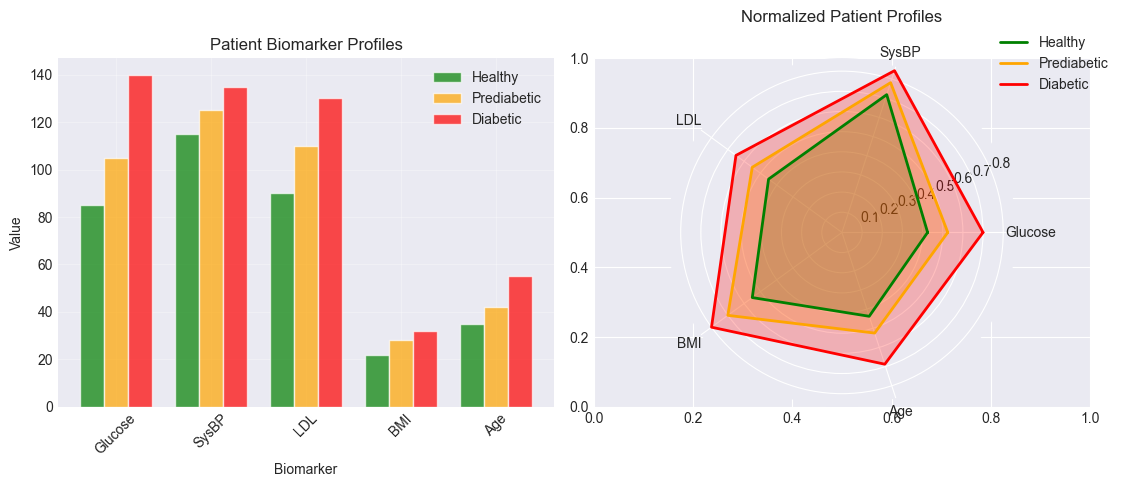

In [2]:
# Define three patient profiles with different biomarkers
# [Glucose, SysBP, LDL, BMI, Age]
patient_healthy = np.array([85, 115, 90, 22, 35])
patient_prediabetic = np.array([105, 125, 110, 28, 42])
patient_diabetic = np.array([140, 135, 130, 32, 55])

biomarker_names = ['Glucose', 'SysBP', 'LDL', 'BMI', 'Age']

# Visualize patient profiles
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot comparison
x_pos = np.arange(len(biomarker_names))
width = 0.25

axes[0].bar(x_pos - width, patient_healthy, width, label='Healthy', color='green', alpha=0.7)
axes[0].bar(x_pos, patient_prediabetic, width, label='Prediabetic', color='orange', alpha=0.7)
axes[0].bar(x_pos + width, patient_diabetic, width, label='Diabetic', color='red', alpha=0.7)

axes[0].set_xlabel('Biomarker')
axes[0].set_ylabel('Value')
axes[0].set_title('Patient Biomarker Profiles')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(biomarker_names, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Radar plot
angles = np.linspace(0, 2*np.pi, len(biomarker_names), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

ax = plt.subplot(122, projection='polar')

# Normalize for radar plot
max_vals = np.array([200, 160, 200, 40, 80])  # Max expected values
healthy_norm = np.append(patient_healthy / max_vals, patient_healthy[0] / max_vals[0])
prediabetic_norm = np.append(patient_prediabetic / max_vals, patient_prediabetic[0] / max_vals[0])
diabetic_norm = np.append(patient_diabetic / max_vals, patient_diabetic[0] / max_vals[0])

ax.plot(angles, healthy_norm, 'g-', linewidth=2, label='Healthy')
ax.fill(angles, healthy_norm, 'green', alpha=0.25)
ax.plot(angles, prediabetic_norm, 'orange', linewidth=2, label='Prediabetic')
ax.fill(angles, prediabetic_norm, 'orange', alpha=0.25)
ax.plot(angles, diabetic_norm, 'r-', linewidth=2, label='Diabetic')
ax.fill(angles, diabetic_norm, 'red', alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(biomarker_names)
ax.set_title('Normalized Patient Profiles', y=1.08)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

In [3]:
# Calculate L2 norms (magnitude of each patient vector)
norm_healthy = np.linalg.norm(patient_healthy)
norm_prediabetic = np.linalg.norm(patient_prediabetic)
norm_diabetic = np.linalg.norm(patient_diabetic)

print("Vector Magnitudes (L2 Norms):")
print(f"  Healthy:      {norm_healthy:.2f}")
print(f"  Prediabetic:  {norm_prediabetic:.2f}") 
print(f"  Diabetic:     {norm_diabetic:.2f}")
print()

# Calculate cosine similarities between patients
# Cosine similarity = dot(a,b) / (norm(a) * norm(b))
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

sim_h_p = cosine_similarity(patient_healthy, patient_prediabetic)
sim_h_d = cosine_similarity(patient_healthy, patient_diabetic)
sim_p_d = cosine_similarity(patient_prediabetic, patient_diabetic)

print("Cosine Similarities (0=orthogonal, 1=identical):")
print(f"  Healthy vs Prediabetic:   {sim_h_p:.3f}")
print(f"  Healthy vs Diabetic:      {sim_h_d:.3f}")
print(f"  Prediabetic vs Diabetic:  {sim_p_d:.3f}")
print()

# Calculate Euclidean distances
dist_h_p = np.linalg.norm(patient_healthy - patient_prediabetic)
dist_h_d = np.linalg.norm(patient_healthy - patient_diabetic)
dist_p_d = np.linalg.norm(patient_prediabetic - patient_diabetic)

print("Euclidean Distances:")
print(f"  Healthy to Prediabetic:   {dist_h_p:.2f}")
print(f"  Healthy to Diabetic:      {dist_h_d:.2f}")
print(f"  Prediabetic to Diabetic:  {dist_p_d:.2f}")

Vector Magnitudes (L2 Norms):
  Healthy:      173.95
  Prediabetic:  203.22
  Diabetic:     242.43

Cosine Similarities (0=orthogonal, 1=identical):
  Healthy vs Prediabetic:   0.998
  Healthy vs Diabetic:      0.990
  Prediabetic vs Diabetic:  0.996

Euclidean Distances:
  Healthy to Prediabetic:   31.38
  Healthy to Diabetic:      74.33
  Prediabetic to Diabetic:  43.70


#### Task 2: Projections - Risk Assessment (10 minutes)

In [4]:
# Define risk direction vectors (weights for each biomarker)
# Higher weights indicate stronger association with risk

# Diabetes risk: emphasizes glucose and BMI
diabetes_risk_vector = np.array([3, 1, 0.5, 2, 0.5])  # [Glucose, SysBP, LDL, BMI, Age]
diabetes_risk_vector = diabetes_risk_vector / np.linalg.norm(diabetes_risk_vector)  # Normalize

# Cardiovascular risk: emphasizes BP and LDL
cardio_risk_vector = np.array([0.5, 3, 3, 1, 1])
cardio_risk_vector = cardio_risk_vector / np.linalg.norm(cardio_risk_vector)

print("Risk Direction Vectors (normalized):")
print(f"Diabetes risk weights: {diabetes_risk_vector}")
print(f"Cardio risk weights:   {cardio_risk_vector}")
print()

Risk Direction Vectors (normalized):
Diabetes risk weights: [0.7878386  0.26261287 0.13130643 0.52522573 0.13130643]
Cardio risk weights:   [0.11111111 0.66666667 0.66666667 0.22222222 0.22222222]



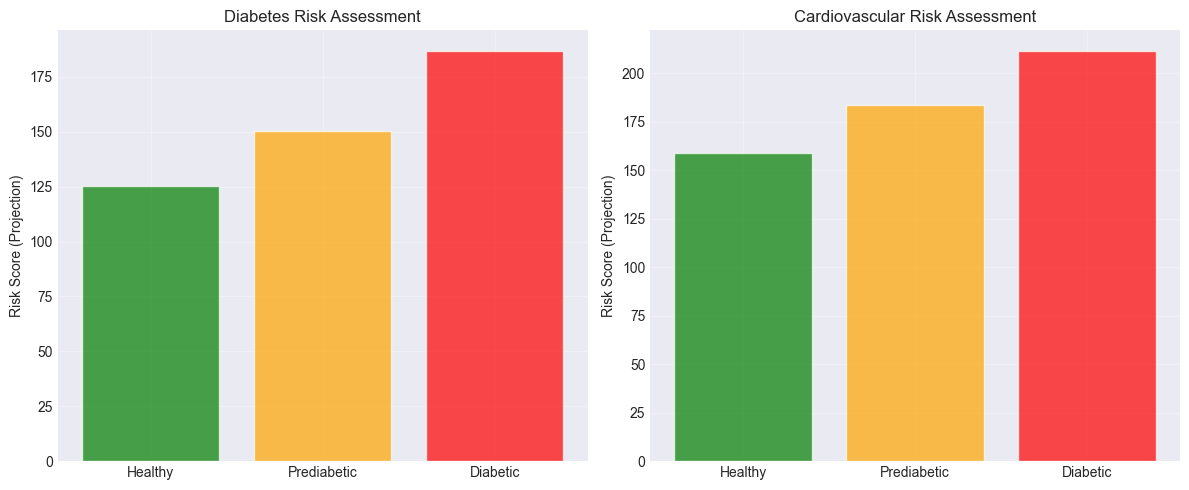

Risk Scores (higher = higher risk):

Diabetes Risk:
  Healthy     : 125.14
  Prediabetic : 150.21
  Diabetic    : 186.85

Cardiovascular Risk:
  Healthy     : 158.78
  Prediabetic : 183.89
  Diabetic    : 211.56


In [5]:
# Project each patient onto diabetes risk direction
# Projection length = dot(patient, risk_direction)
diabetes_score_healthy = np.dot(patient_healthy, diabetes_risk_vector)
diabetes_score_prediabetic = np.dot(patient_prediabetic, diabetes_risk_vector)
diabetes_score_diabetic = np.dot(patient_diabetic, diabetes_risk_vector)

# Project onto cardiovascular risk direction
cardio_score_healthy = np.dot(patient_healthy, cardio_risk_vector)
cardio_score_prediabetic = np.dot(patient_prediabetic, cardio_risk_vector)
cardio_score_diabetic = np.dot(patient_diabetic, cardio_risk_vector)

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Diabetes risk scores
patients = ['Healthy', 'Prediabetic', 'Diabetic']
diabetes_scores = [diabetes_score_healthy, diabetes_score_prediabetic, diabetes_score_diabetic]
colors = ['green', 'orange', 'red']

axes[0].bar(patients, diabetes_scores, color=colors, alpha=0.7)
axes[0].set_ylabel('Risk Score (Projection)')
axes[0].set_title('Diabetes Risk Assessment')
axes[0].grid(True, alpha=0.3)

# Cardiovascular risk scores
cardio_scores = [cardio_score_healthy, cardio_score_prediabetic, cardio_score_diabetic]

axes[1].bar(patients, cardio_scores, color=colors, alpha=0.7)
axes[1].set_ylabel('Risk Score (Projection)')
axes[1].set_title('Cardiovascular Risk Assessment')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Risk Scores (higher = higher risk):")
print("\nDiabetes Risk:")
for patient, score in zip(patients, diabetes_scores):
    print(f"  {patient:12s}: {score:.2f}")
print("\nCardiovascular Risk:")
for patient, score in zip(patients, cardio_scores):
    print(f"  {patient:12s}: {score:.2f}")

#### Task 3: Matrix Operations and Covariance (15 minutes)

In [6]:
# Generate a larger patient cohort
n_patients = 150
n_biomarkers = 5

# Create correlated biomarker data
# Mean values for [Glucose, SysBP, LDL, BMI, Age]
mean = [95, 120, 100, 25, 45]

# Covariance structure (realistic correlations)
# Glucose correlates with BMI
# SysBP correlates with Age and BMI
# LDL correlates slightly with BMI and Age
cov = [[225, 30, 20, 40, 25],    # Glucose
       [30, 400, 35, 50, 80],     # SysBP
       [20, 35, 625, 30, 40],     # LDL
       [40, 50, 30, 25, 15],      # BMI
       [25, 80, 40, 15, 144]]     # Age

# Generate patient data
X = np.random.multivariate_normal(mean, cov, n_patients)

# Create DataFrame for easier manipulation
df = pd.DataFrame(X, columns=['Glucose', 'SysBP', 'LDL', 'BMI', 'Age'])

print(f"Patient cohort shape: {X.shape}")
print(f"  {X.shape[0]} patients × {X.shape[1]} biomarkers")
print("\nFirst 5 patients:")
print(df.head().round(1))
print("\nSummary statistics:")
print(df.describe().round(1))

Patient cohort shape: (150, 5)
  150 patients × 5 biomarkers

First 5 patients:
   Glucose  SysBP    LDL   BMI   Age
0     86.2  121.0   89.8  24.0  26.3
1     89.5  152.5   98.1  25.8  57.8
2     87.2  108.7  112.6  28.9  63.6
3     86.0  102.0  118.4  27.1  50.6
4     88.2  104.5   64.5  22.7  54.3

Summary statistics:
       Glucose  SysBP    LDL    BMI    Age
count    150.0  150.0  150.0  150.0  150.0
mean      96.2  119.8  101.3   25.2   44.7
std       13.9   21.1   21.9    5.2   11.8
min       62.2   70.1   41.2   10.4   16.3
25%       87.2  104.5   87.6   22.7   36.0
50%       96.1  118.8   99.6   25.8   44.7
75%      105.9  136.0  117.4   28.9   53.2
max      141.6  160.2  152.8   37.8   72.3


Covariance matrices match: True



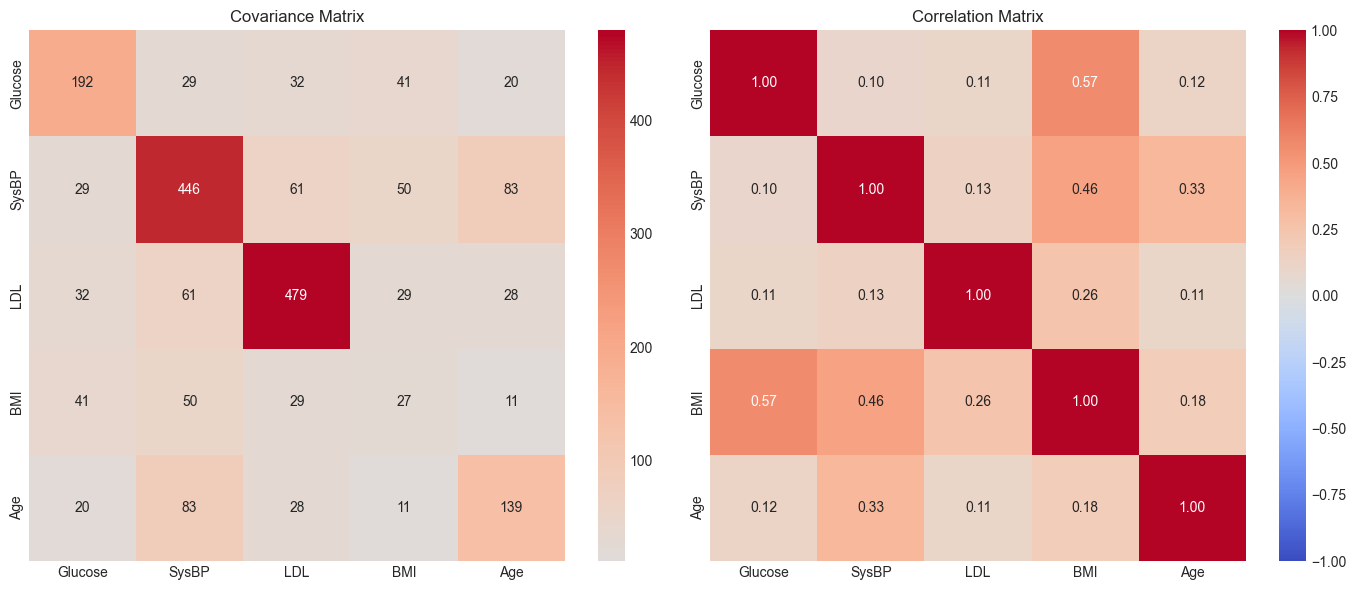


Key Biomarker Relationships:
  Glucose-BMI correlation:     0.567
  SysBP-Age correlation:       0.332
  SysBP-BMI correlation:       0.456
  LDL-Age correlation:         0.107


In [7]:
# Center the data (subtract mean from each column)
X_centered = X - np.mean(X, axis=0)

# Calculate covariance matrix manually
# Cov = (1/(n-1)) * X_centered.T @ X_centered
cov_manual = (1 / (n_patients - 1)) * (X_centered.T @ X_centered)

# Calculate using NumPy function
cov_numpy = np.cov(X, rowvar=False)

# Verify they match
print("Covariance matrices match:", np.allclose(cov_manual, cov_numpy))
print()

# Visualize covariance matrix
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Covariance heatmap
sns.heatmap(cov_manual, annot=True, fmt='.0f',
            xticklabels=df.columns,
            yticklabels=df.columns,
            cmap='coolwarm', center=0,
            ax=axes[0])
axes[0].set_title('Covariance Matrix')

# Correlation heatmap
# Convert covariance to correlation
std_devs = np.sqrt(np.diag(cov_manual))
corr_matrix = cov_manual / np.outer(std_devs, std_devs)

sns.heatmap(corr_matrix, annot=True, fmt='.2f',
            xticklabels=df.columns,
            yticklabels=df.columns,
            cmap='coolwarm', center=0,
            vmin=-1, vmax=1,
            ax=axes[1])
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Interpret key relationships
print("\nKey Biomarker Relationships:")
print(f"  Glucose-BMI correlation:     {corr_matrix[0,3]:.3f}")
print(f"  SysBP-Age correlation:       {corr_matrix[1,4]:.3f}")
print(f"  SysBP-BMI correlation:       {corr_matrix[1,3]:.3f}")
print(f"  LDL-Age correlation:         {corr_matrix[2,4]:.3f}")

In [8]:
# Outer product demonstration - creating covariance from vectors
# Select two patients for demonstration
patient_a = X_centered[0]
patient_b = X_centered[1]

# Outer product creates a matrix
outer_ab = np.outer(patient_a, patient_b)

print("Outer Product Demonstration:")
print(f"Patient A (centered): {patient_a.round(1)}")
print(f"Patient B (centered): {patient_b.round(1)}")
print(f"\nOuter product shape: {outer_ab.shape}")
print("\nOuter product matrix:")
print(outer_ab.round(1))
print("\nNote: Covariance matrix is the average of outer products of centered data with itself")

Outer Product Demonstration:
Patient A (centered): [-10.    1.1 -11.5  -1.2 -18.4]
Patient B (centered): [-6.7 32.7 -3.2  0.6 13.1]

Outer product shape: (5, 5)

Outer product matrix:
[[  66.9 -326.7   32.    -6.  -130.8]
 [  -7.6   37.1   -3.6    0.7   14.8]
 [  77.2 -376.8   36.9   -6.9 -150.9]
 [   7.9  -38.8    3.8   -0.7  -15.5]
 [ 123.2 -601.7   58.9  -11.  -241. ]]

Note: Covariance matrix is the average of outer products of centered data with itself


### Micro-Deliverable: Matrix Analysis of Clinical Data

**Task:** Apply vector and matrix operations to analyze a metabolic syndrome dataset.

Complete the following:
1. Calculate patient similarity matrix
2. Find the most and least similar patient pairs
3. Compute and visualize the covariance structure
4. Provide clinical interpretation

In [ ]:
# STUDENT WORK CELL - Micro-deliverable

# Generate metabolic syndrome dataset
np.random.seed(42)
n_patients = 50

# Features: [Waist, Triglycerides, HDL, Glucose, SysBP]
# Units: [cm, mg/dL, mg/dL, mg/dL, mmHg]
metabolic_data = np.random.multivariate_normal(
    mean=[95, 150, 45, 100, 125],
    cov=[[100, 80, -30, 40, 35],      # Waist
         [80, 2500, -100, 150, 60],   # Triglycerides
         [-30, -100, 144, -20, -15],  # HDL (negative correlations)
         [40, 150, -20, 400, 30],     # Glucose
         [35, 60, -15, 30, 225]],     # SysBP
    size=n_patients
)

feature_names = ['Waist', 'Triglycerides', 'HDL', 'Glucose', 'SysBP']

# TODO 1: Calculate pairwise patient similarity matrix
# Use cosine similarity between all patient pairs

from sklearn.preprocessing import normalize

# YOUR CODE HERE
# Normalize each patient vector
metabolic_normalized = ...

# YOUR CODE HERE
# Calculate similarity matrix (dot product of normalized vectors)
similarity_matrix = ...


In [ ]:
# TODO 2: Find most and least similar patient pairs

# Set diagonal to -1 to exclude self-similarity
sim_matrix_no_diag = similarity_matrix.copy()
np.fill_diagonal(sim_matrix_no_diag, -1)

# Find maximum similarity
# YOUR CODE HERE
max_sim_idx = ...
max_similarity = ...

# Find minimum similarity
# YOUR CODE HERE
min_sim_idx = ...
min_similarity = ...

print(f"Most similar patients: {max_sim_idx[0]} and {max_sim_idx[1]}")
print(f"  Similarity: {max_similarity:.3f}")
print(f"\nLeast similar patients: {min_sim_idx[0]} and {min_sim_idx[1]}")
print(f"  Similarity: {min_similarity:.3f}")


In [ ]:
# TODO 3: Visualize similarity matrix and covariance

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Patient similarity heatmap
# YOUR CODE HERE
im1 = axes[0].imshow(...) # fill in the parentheses

axes[0].set_title('Patient Similarity Matrix')
axes[0].set_xlabel('Patient ID')
axes[0].set_ylabel('Patient ID')
plt.colorbar(im1, ax=axes[0])

# Feature covariance
# YOUR CODE HERE
cov_metabolic = np.cov(...) # fill in the parentheses

sns.heatmap(cov_metabolic, annot=True, fmt='.0f',
            xticklabels=feature_names,
            yticklabels=feature_names,
            cmap='coolwarm', center=0,
            ax=axes[1])
axes[1].set_title('Feature Covariance')

# Feature correlation
# YOUR CODE HERE
corr_metabolic = np.corrcoef(...) # fill in the parentheses
sns.heatmap(corr_metabolic, annot=True, fmt='.2f',
            xticklabels=feature_names,
            yticklabels=feature_names,
            cmap='coolwarm', center=0,
            vmin=-1, vmax=1,
            ax=axes[2])
axes[2].set_title('Feature Correlation')

plt.tight_layout()
plt.show()

### Grading Rubric

- **2 points (Complete):** Similarity matrix calculated, basic visualization created
- **3 points (Insightful):** Most/least similar pairs identified, covariance analyzed
- **4 points (Exceptional):** Clear visualizations, detailed correlation analysis

### Summary and Preview

**What we learned today:**
- Vectors represent patient states in high-dimensional space
- Dot products measure similarity and enable projections
- Matrices organize multi-patient, multi-feature data
- Covariance reveals relationships between biomarkers

**Next lecture (Part II):**
- Eigenvalues and eigenvectors: Finding the "natural axes" of data
- Principal Component Analysis: Dimensionality reduction
- Singular Value Decomposition: Advanced matrix factorization
- Application to medical imaging compression